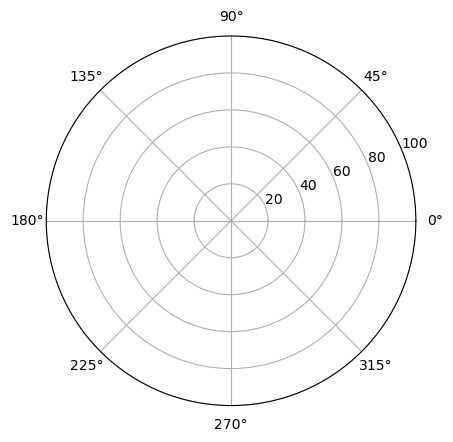

In [24]:
import random
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# Constants
WIDTH, HEIGHT = 800, 600
RADIUS = 30
NUM_PARTICLES = 1

class Particle:
    def __init__(self):
        self.r = random.randint(0, 100)
        self.beta = random.uniform(0, 2*np.pi)
        self.radius = RADIUS
        self.speed = 1
        self.vr = 0.9  # Random radial velocity
        self.vb = np.sqrt(self.speed**2 - self.vr**2)  # Calculate angular velocity

    def update(self):
        self.r += self.vr
        self.beta += self.vb

def update(frame):
    for particle in particles:
        particle.update()
    r_data = [particle.r for particle in particles]
    beta_data = [particle.beta for particle in particles]
    scatter.set_offsets(list(zip(beta_data, r_data)))  # Plotting in polar coordinates
    return scatter,

def init():
    r_data = [particle.r for particle in particles]
    beta_data = [particle.beta for particle in particles]
    scatter.set_offsets(list(zip(beta_data, r_data)))
    return scatter,

# Create particles
particles = [Particle() for _ in range(NUM_PARTICLES)]

# Create plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_rlim(0,100)
scatter = ax.scatter([], [], s=1000)

# Animate
ani = FuncAnimation(fig, update, frames=50, init_func=init, blit=True, interval=1)
ani.save('xhess.gif', writer='imagemagick')
plt.show()

In [28]:
import numpy as np
import math

def find_gamma_angle(x, y, theta):
    N = len(x)
    gamma_angle = np.zeros(N)

    for i in range(N):
        other_angles = []
        for j in range(N):
            if j != i:
                dx = x[j] - x[i]
                dy = y[j] - y[i]
                angle = math.atan2(dy, dx) % (2 * np.pi)
                diff = (angle - theta[i]) % (2 * np.pi)
                
                # Use cross-product to determine clockwise or anti-clockwise
                cross_product = dx * np.sin(diff) - dy * np.cos(diff)
                if cross_product > 0:
                    diff = -diff
                
                other_angles.append(diff)
                
        other_angles = np.array(other_angles)
        gamma_angle[i] = np.min(np.abs(other_angles))
    
    return gamma_angle

# Example usage
x = [0, 10]  # X positions of particles
y = [0, 10]  # Y positions of particles
theta = [np.pi/2, np.pi]  # Angles of particles

gamma_angle = find_gamma_angle(x, y, theta)

print("Gamma Angles:")
print(np.degrees(gamma_angle))

Gamma Angles:
[45. 45.]
